<a href="https://colab.research.google.com/github/Mariam-Elbishbeashy/Healthcare-Classification-ML/blob/main/HealthCareTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1626]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/healthcare/train data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1627]:
df.shape


(50000, 16)

In [1628]:
df.head()

ID           Name  Age  Gender Blood Type Medical Condition  \
0   1  Bobby JacksOn   27  Female         O-            Asthma   
1   2   LesLie TErRy   68  Female         O-            Cancer   
2   3    DaNnY sMitH   21  Female         A+      Hypertension   
3   4   andrEw waTtS   91    Male        AB-          Diabetes   
4   5  adrIENNE bEll   52  Female         A+          Diabetes   

  Date of Admission            Doctor         Hospital Insurance Provider  \
0        06/06/2022  Mark Hartman Jr.  Sons and Miller              Cigna   
1        19/11/2021  Angela Contreras      White-White              Cigna   
2        05/03/2022        David Ruiz  Group Middleton           Medicare   
3        06/04/2020    Jenny Griffith  Morris-Arellano         Blue Cross   
4        31/12/2022     Cynthia Scott   Williams-Davis         Blue Cross   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     2625.980554          379       Elective     18/08/2022    Ibuprofen   
1     1471.387317          113       Elective     20/11/2021    Ibuprofen   
2     5131.488104          154      Emergency     16/05/2022  Paracetamol   
3     8972.793157          293         Urgent     26/04/2020    Ibuprofen   
4     2015.522684          265      Emergency     11/02/2023   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [1629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  int64  
 3   Gender              50000 non-null  object 
 4   Blood Type          46935 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              49196 non-null  object 
 8   Hospital            49041 non-null  object 
 9   Insurance Provider  49707 non-null  object 
 10  Billing Amount      49276 non-null  float64
 11  Room Number         50000 non-null  int64  
 12  Admission Type      49819 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [1630]:
# Set pandas to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show number of missing values for all 16 features
print(df.isnull().sum())

ID                       0
Name                     0
Age                      0
Gender                   0
Blood Type            3065
Medical Condition        0
Date of Admission        0
Doctor                 804
Hospital               959
Insurance Provider     293
Billing Amount         724
Room Number              0
Admission Type         181
Discharge Date           0
Medication               0
Test Results             0
dtype: int64


In [1631]:
# Drop rows where ALL values are null (entire row is empty)
df = df.dropna(how='all')

# Verify the new shape (should be 50,000 rows now)
print("New shape after dropping null rows:", df.shape)  # Expected: (50000, 16)

# Confirm no fully null rows remain
print("\nNull counts after cleaning:")
print(df.isnull().sum())

New shape after dropping null rows: (50000, 16)

Null counts after cleaning:
ID                       0
Name                     0
Age                      0
Gender                   0
Blood Type            3065
Medical Condition        0
Date of Admission        0
Doctor                 804
Hospital               959
Insurance Provider     293
Billing Amount         724
Room Number              0
Admission Type         181
Discharge Date           0
Medication               0
Test Results             0
dtype: int64


In [1632]:
# Replace nulls in categorical columns by reassignment
df['Blood Type'] = df['Blood Type'].fillna('Unknown')
df['Doctor'] = df['Doctor'].fillna('Unknown')
df['Hospital'] = df['Hospital'].fillna('Unknown')
df['Insurance Provider'] = df['Insurance Provider'].fillna('Self-Pay')
df['Admission Type'] = df['Admission Type'].fillna('Unknown')

# For Billing Amount, use median imputation
median_billing = df['Billing Amount'].median()
df['Billing Amount'] = df['Billing Amount'].fillna(median_billing)

In [1633]:
# prompt: how many null values

print("\nNull counts after imputation:")
print(df.isnull().sum())


Null counts after imputation:
ID                    0
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


# Handling Blood Type Missing Rows

In [1634]:
import pandas as pd
print(df[df['Blood Type'].isnull()].groupby(['Hospital', 'Admission Type']).size())

Series([], dtype: int64)


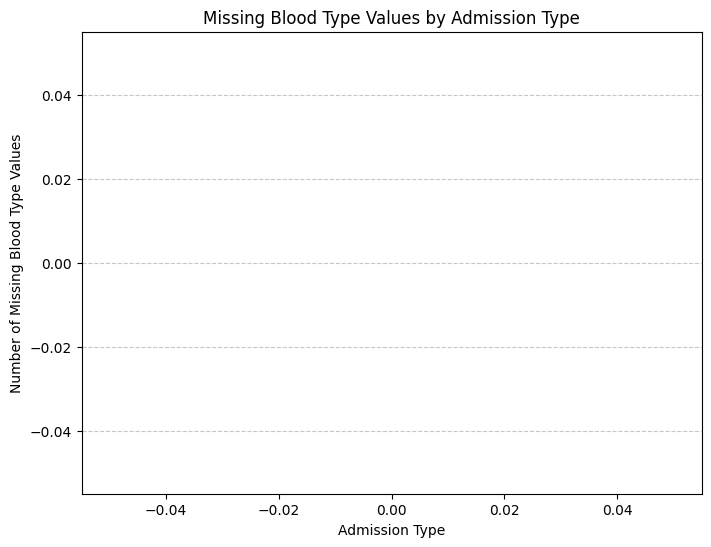

In [1635]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataset; load it if not already loaded
# df = pd.read_csv('your_dataset.csv')  # Uncomment and update path if needed

# Group by Hospital and Admission Type, get size of missing Blood Type values
missing_data = df[df['Blood Type'].isnull()].groupby(['Hospital', 'Admission Type']).size()

# Aggregate by Admission Type to get total missing values for each type
missing_by_admission = missing_data.groupby('Admission Type').sum()

# Prepare data for plotting
admission_types = missing_by_admission.index
missing_counts = missing_by_admission.values

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(admission_types, missing_counts, color=['#4CAF50', '#F44336', '#2196F3'], edgecolor=['#388E3C', '#D32F2F', '#1976D2'], linewidth=1)

# Customize the plot
plt.title('Missing Blood Type Values by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Number of Missing Blood Type Values')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [1636]:
print(df['Admission Type'].unique())

['Elective' 'Emergency' 'Urgent' 'Unknown']



Crosstab of Blood Type vs Test Results:
Test Results  Abnormal  Inconclusive  Normal
Blood Type                                  
A+                 849          2552    3472
A-                1684           830     834
AB+                816          3331     823
AB-               3321           813    1605
B+                 818           771    1689
B-                3346          4063    4929
O+                2088          1485     983
O-                2529          1689    1615
Unknown           1321          1010     734


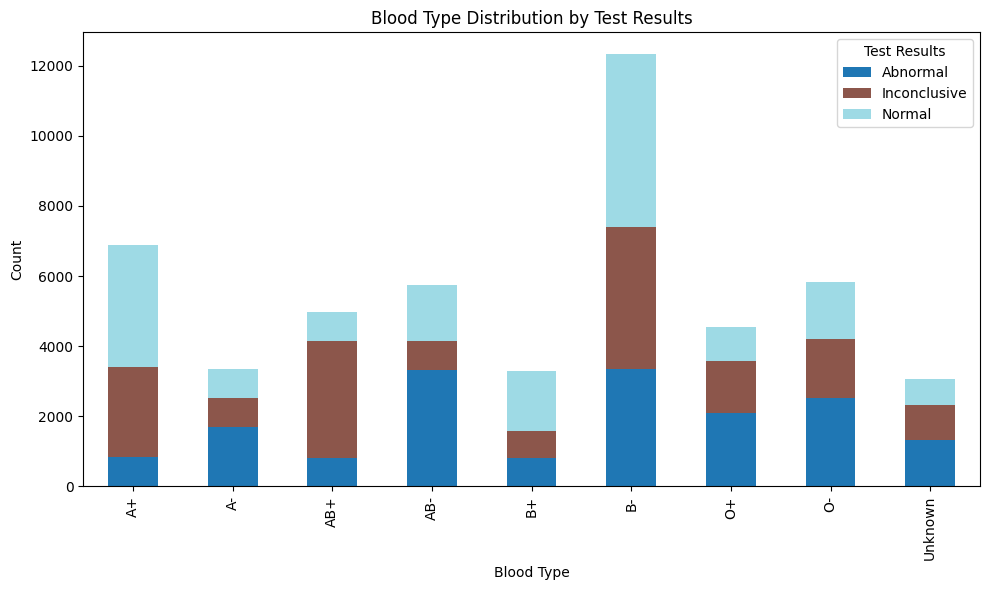

In [1637]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment if needed

# Create crosstab of Blood Type vs Test Results
crosstab = pd.crosstab(df['Blood Type'], df['Test Results'])

# Display the crosstab
print("\nCrosstab of Blood Type vs Test Results:")
print(crosstab)

# Visualize as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Blood Type Distribution by Test Results')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Test Results')
plt.tight_layout()
plt.show()

In [1638]:
# prompt: how many inconclusive test results do we have as null in blood type

# Filter the DataFrame to include only rows where 'Test Results' is 'Inconclusive'
inconclusive_results = df[df['Test Results'] == 'Inconclusive']

# Count how many of these rows have 'Blood Type' as null
inconclusive_blood_type_null_count = inconclusive_results['Blood Type'].isnull().sum()

print(f"\nNumber of inconclusive test results with null blood type: {inconclusive_blood_type_null_count}")


Number of inconclusive test results with null blood type: 0


In [1639]:
# Get the distribution of known blood types
known_blood_types = df[df['Blood Type'] != 'Unknown']['Blood Type']
prob_dist = known_blood_types.value_counts(normalize=True)

# Get indices where blood type is unknown
unknown_indices = df[df['Blood Type'] == 'Unknown'].index

# Randomly assign blood types to 'Unknown' based on real distribution
np.random.seed(0)  # for reproducibility
df.loc[unknown_indices, 'Blood Type'] = np.random.choice(
    prob_dist.index, size=len(unknown_indices), p=prob_dist.values
)


Crosstab of Blood Type vs Test Results:
Test Results  Abnormal  Inconclusive  Normal
Blood Type                                  
A+                1050          2733    3571
A-                1774           894     899
AB+                955          3435     902
AB-               3471           932    1680
B+                 918           850    1762
B-                3683          4312    5121
O+                2214          1581    1054
O-                2707          1807    1695


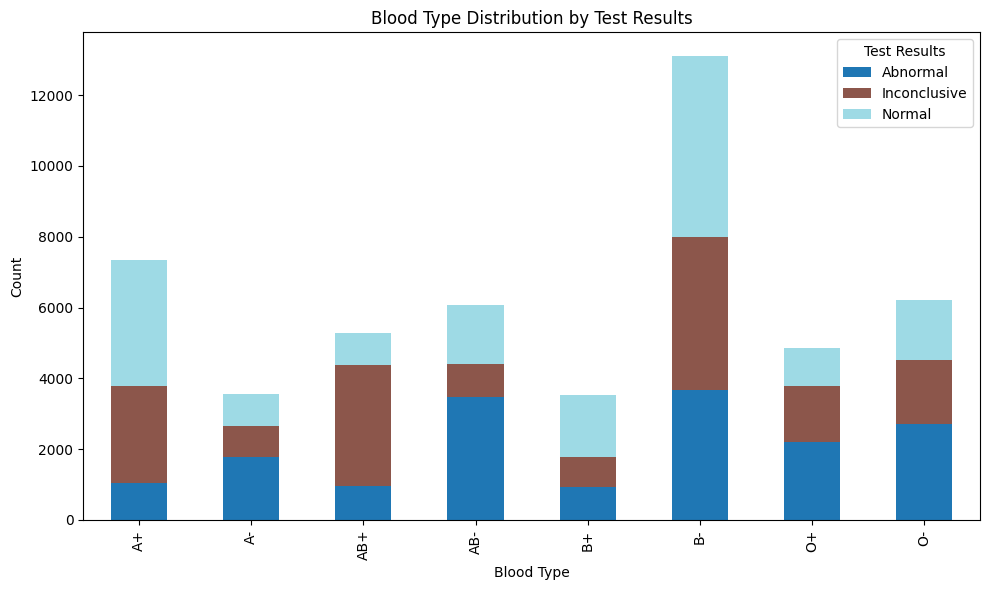

In [1640]:
# Create crosstab of Blood Type vs Test Results
crosstab = pd.crosstab(df['Blood Type'], df['Test Results'])

# Display the crosstab
print("\nCrosstab of Blood Type vs Test Results:")
print(crosstab)

# Visualize as a stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Blood Type Distribution by Test Results')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.legend(title='Test Results')
plt.tight_layout()
plt.show()

In [1641]:
(df.isnull().sum()/df.shape[0])*100

ID                    0.0
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64

In [1642]:
df = df.drop(['ID'], axis=1)


In [1643]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [1644]:
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:")
print(missing_rows)

Rows with missing values:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [1645]:
print("Percentage of missing values per column:")
print((df.isnull().mean() * 100).round(2))

Percentage of missing values per column:
Name                  0.0
Age                   0.0
Gender                0.0
Blood Type            0.0
Medical Condition     0.0
Date of Admission     0.0
Doctor                0.0
Hospital              0.0
Insurance Provider    0.0
Billing Amount        0.0
Room Number           0.0
Admission Type        0.0
Discharge Date        0.0
Medication            0.0
Test Results          0.0
dtype: float64


In [1646]:
# Capitalize properly for consistency
df['Name'] = df['Name'].str.title()
df['Doctor'] = df['Doctor'].str.title()
df['Hospital'] = df['Hospital'].str.title()


In [1647]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   27  Female         O-            Asthma        06/06/2022   
1   Leslie Terry   68  Female         O-            Cancer        19/11/2021   
2    Danny Smith   21  Female         A+      Hypertension        05/03/2022   
3   Andrew Watts   91    Male        AB-          Diabetes        06/04/2020   
4  Adrienne Bell   52  Female         A+          Diabetes        31/12/2022   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0  Mark Hartman Jr.  Sons And Miller              Cigna     2625.980554   
1  Angela Contreras      White-White              Cigna     1471.387317   
2        David Ruiz  Group Middleton           Medicare     5131.488104   
3    Jenny Griffith  Morris-Arellano         Blue Cross     8972.793157   
4     Cynthia Scott   Williams-Davis         Blue Cross     2015.522684   

   Room Number Admission Type Discharge Date   Medication  Test Results  
0          379       Elective     18/08/2022    Ibuprofen        Normal  
1          113       Elective     20/11/2021    Ibuprofen  Inconclusive  
2          154      Emergency     16/05/2022  Paracetamol        Normal  
3          293         Urgent     26/04/2020    Ibuprofen      Abnormal  
4          265      Emergency     11/02/2023   Penicillin      Abnormal

In [1648]:
!pip install gender-guesser
from gender_guesser.detector import Detector

detector = Detector()

def infer_gender(name):
    name_lower = name.lower()

    # Check for titles
    if name_lower.startswith('mrs.') or name_lower.startswith('ms.'):
        return 'Female'
    elif name_lower.startswith('mr.'):
        return 'Male'

    # If no title, use first name with gender_guesser
    first = name.split()[0]
    g = detector.get_gender(first)
    if g in ('male', 'mostly_male'):
        return 'Male'
    elif g in ('female', 'mostly_female'):
        return 'Female'

    return None  # Skip uncertain guesses

# Apply inference
df['Inferred Gender'] = df['Name'].map(infer_gender)

# Update only where inference is confident and different from existing
mismatches = df[
    df['Inferred Gender'].notnull() &
    (df['Inferred Gender'] != df['Gender'])
]

df.loc[mismatches.index, 'Gender'] = df.loc[mismatches.index, 'Inferred Gender']


In [1649]:
df.head(20)

Name  Age  Gender Blood Type Medical Condition  \
0         Bobby Jackson   27    Male         O-            Asthma   
1          Leslie Terry   68  Female         O-            Cancer   
2           Danny Smith   21    Male         A+      Hypertension   
3          Andrew Watts   91    Male        AB-          Diabetes   
4         Adrienne Bell   52  Female         A+          Diabetes   
5         Emily Johnson   29  Female         A+            Asthma   
6        Edward Edwards   58    Male         A+            Asthma   
7    Christina Martinez   29  Female         B-           Obesity   
8       Jasmine Aguilar   53  Female         O-           Obesity   
9      Christopher Berg   56    Male         O+            Asthma   
10     Michelle Daniels   80  Female         B-      Hypertension   
11       Aaron Martinez   66    Male        AB-            Asthma   
12        Connor Hansen   36    Male         B-            Cancer   
13         Robert Bauer   32    Male         B-           Obesity   
14         Brooke Brady   74  Female        AB-            Cancer   
15   Ms. Natalie Gamble    6  Female         A+           Obesity   
16        Haley Perkins   58  Female         A+           Obesity   
17  Mrs. Jamie Campbell   86  Female        AB-      Hypertension   
18         Luke Burgess   99    Male         A-            Asthma   
19       Daniel Schmidt   32    Male         A+           Obesity   

   Date of Admission            Doctor                    Hospital  \
0         06/06/2022  Mark Hartman Jr.             Sons And Miller   
1         19/11/2021  Angela Contreras                 White-White   
2         05/03/2022        David Ruiz             Group Middleton   
3         06/04/2020    Jenny Griffith             Morris-Arellano   
4         31/12/2022     Cynthia Scott              Williams-Davis   
5         19/08/2020     Julie Ramirez             Cervantes-Wells   
6         02/11/2021        David Ruiz                   Jones Llc   
7         28/07/2021   Theresa Freeman             Schaefer-Porter   
8         18/07/2023       Connie Boyd            Rivera-Gutierrez   
9         08/04/2023       Rose Zuniga                   Plc Young   
10        11/04/2021    Travis Parsons                 White-White   
11        22/04/2022      John Summers             Morris-Arellano   
12        24/12/2020     Erika Jackson               Meadows Group   
13        20/07/2019     Patrick Burns                 Houston Plc   
14        04/05/2022           Unknown              Guerrero-Boone   
15        22/09/2024     Cameron Young             Morris-Arellano   
16        18/09/2023           Unknown             Schaefer-Porter   
17        18/10/2020    Kyle Patterson             Group Middleton   
18        10/11/2021    Patricia Colon                 Houston Plc   
19        18/06/2020    Patricia Colon  Torres, And Harrison Jones   

   Insurance Provider  Billing Amount  Room Number Admission Type  \
0               Cigna     2625.980554          379       Elective   
1               Cigna     1471.387317          113       Elective   
2            Medicare     5131.488104          154      Emergency   
3          Blue Cross     8972.793157          293         Urgent   
4          Blue Cross     2015.522684          265      Emergency   
5    UnitedHealthcare    11180.189320          328         Urgent   
6            Self-Pay    10105.940550          335         Urgent   
7               Aetna     3082.121725          118        Unknown   
8            Self-Pay     1799.515116          334         Urgent   
9          Blue Cross      591.847595          333        Unknown   
10           Self-Pay     8790.730348          225       Elective   
11              Aetna     5047.870999           87        Unknown   
12         Blue Cross      800.386387          249         Urgent   
13           Self-Pay      936.030795          184       Elective   
14              Aetna     8624.070995          449       Electi

In [1650]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Inferred Gender'],
      dtype='object')


In [1651]:
import numpy as np
import pandas as pd

def has_outliers_iqr(data):
    try:
        clean_data = pd.to_numeric(data.dropna(), errors='coerce')
        q1 = np.percentile(clean_data, 25)
        q3 = np.percentile(clean_data, 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        return ((clean_data < lower_bound) | (clean_data > upper_bound)).any()
    except:
        # If column can't be converted to numeric, skip it
        return False

# Check all columns
for col in df.columns:
    if has_outliers_iqr(df[col]):
        print(f"✅ Outliers detected in column: '{col}'")
    else:
        print(f"✅ No outliers in column: '{col}'")



✅ No outliers in column: 'Name'
✅ No outliers in column: 'Age'
✅ No outliers in column: 'Gender'
✅ No outliers in column: 'Blood Type'
✅ No outliers in column: 'Medical Condition'
✅ No outliers in column: 'Date of Admission'
✅ No outliers in column: 'Doctor'
✅ No outliers in column: 'Hospital'
✅ No outliers in column: 'Insurance Provider'
✅ No outliers in column: 'Billing Amount'
✅ No outliers in column: 'Room Number'
✅ No outliers in column: 'Admission Type'
✅ No outliers in column: 'Discharge Date'
✅ No outliers in column: 'Medication'
✅ No outliers in column: 'Test Results'
✅ No outliers in column: 'Inferred Gender'


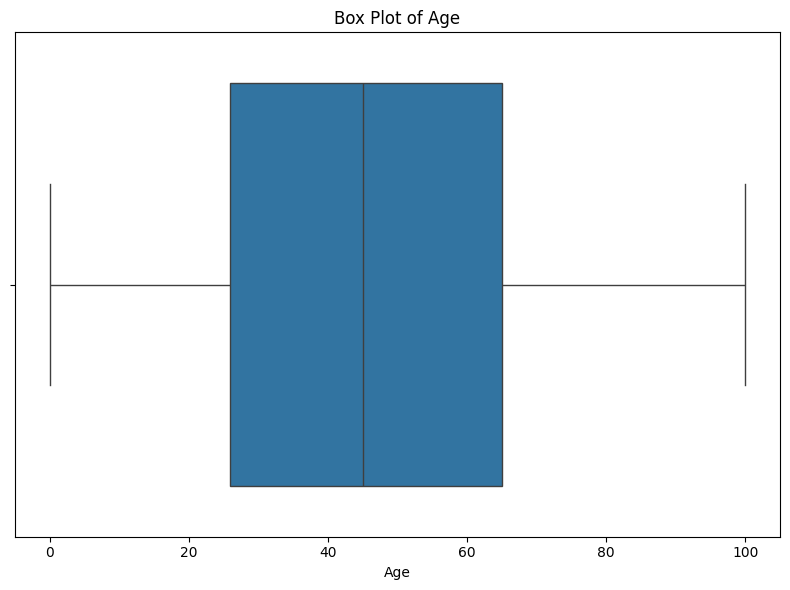

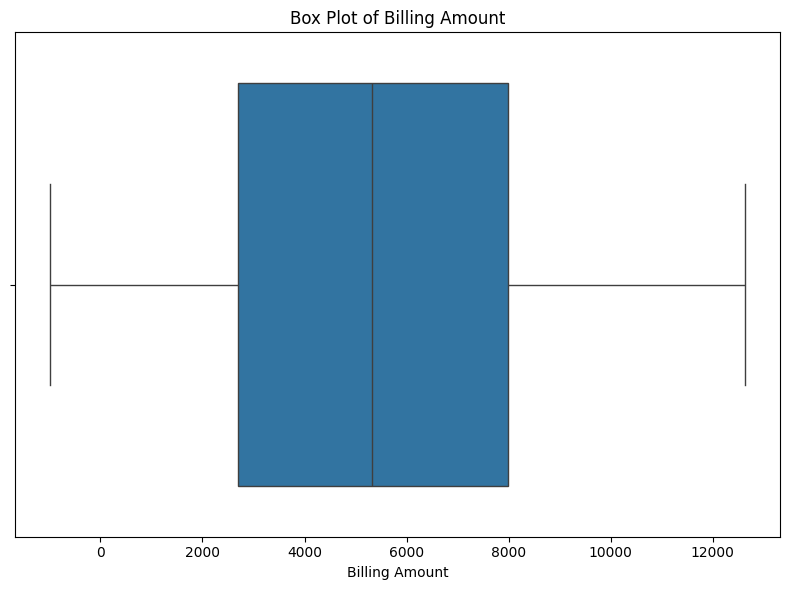

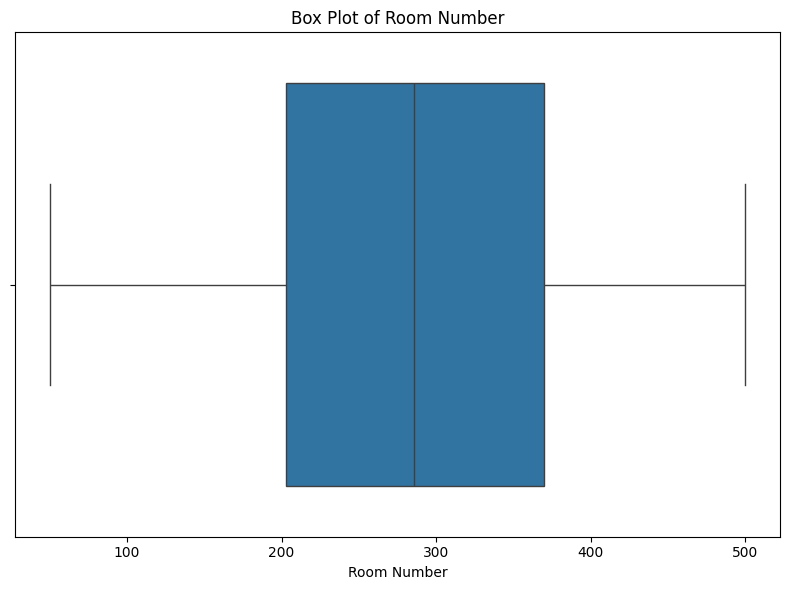

In [1652]:
# Ensure numerical_cols is defined
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Box plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [1653]:
# Check unique values in object columns
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].unique()}\n")

# Check for invalid age
print(df[df['Age'] < 0])

# Check for missing or odd values in Billing Amount
print(df['Billing Amount'].describe())


Name: ['Bobby Jackson' 'Leslie Terry' 'Danny Smith' ... 'Lisa Simpson'
 'Roger Farrell' 'Katherine Webster']

Gender: ['Male' 'Female']

Blood Type: ['O-' 'A+' 'AB-' 'B-' 'O+' 'A-' 'AB+' 'B+']

Medical Condition: ['Asthma' 'Cancer' 'Hypertension' 'Diabetes' 'Obesity' 'Arthritis']

Date of Admission: ['06/06/2022' '19/11/2021' '05/03/2022' ... '23/05/2022' '15/11/2022'
 '14/10/2024']

Doctor: ['Mark Hartman Jr.' 'Angela Contreras' 'David Ruiz' 'Jenny Griffith'
 'Cynthia Scott' 'Julie Ramirez' 'Theresa Freeman' 'Connie Boyd'
 'Rose Zuniga' 'Travis Parsons' 'John Summers' 'Erika Jackson'
 'Patrick Burns' 'Unknown' 'Cameron Young' 'Kyle Patterson'
 'Patricia Colon' 'Kelly Murphy' 'Brian Walton' 'Daniel Ferguson'
 'Kayla Davis' 'Heather Garcia' 'Kari Moore' 'Brandy Mitchell'
 'Amanda Garcia' 'Heather Smith' 'Stephen Carr' 'Lonnie Morgan'
 'Wendy Davis' 'James Ellis' 'Ryan Ross' 'Emily Patterson' 'Brent Smith'
 'Emma Allison' 'Matthew Carter' 'Miguel Parker' 'Julia Cox'
 'Crystal Chavez' 'Ja

In [1654]:
print(f"Number of Billing Amount values below 0: {(df['Billing Amount'] < 0).sum()}")

Number of Billing Amount values below 0: 247


In [1655]:
df[df['Billing Amount'] < 0].head()

Name  Age  Gender Blood Type Medical Condition  \
573   Nicole Francis   44  Female        AB+           Obesity   
990    Joshua Murray   17    Male         A-           Obesity   
1068       Kyle Reed   18  Female         B-          Diabetes   
1387  Robert Roberts   27    Male         B-          Diabetes   
1552    David Flores    6    Male         B-          Diabetes   

     Date of Admission          Doctor         Hospital Insurance Provider  \
573         13/05/2024     Cindy White   And Sons Smith              Aetna   
990         21/11/2022   Cynthia Scott  Sons And Miller         Blue Cross   
1068        26/05/2021      Lucas Cole      Houston Plc           Self-Pay   
1387        02/05/2024  Matthew Walker   And Sons Smith              Cigna   
1552        15/11/2020     Wendy Glenn        Lopez Plc           Medicare   

      Billing Amount  Room Number Admission Type Discharge Date Medication  \
573      -580.891573          248         Urgent     26/05/2024  Ibuprofen   
990      -105.161711          208         Urgent     23/01/2023    Lipitor   
1068     -226.328250          139      Emergency     11/07/2021    Aspirin   
1387     -721.277219          239         Urgent     22/06/2024    Aspirin   
1552     -354.424690          234         Urgent     25/01/2021  Ibuprofen   

      Test Results Inferred Gender  
573   Inconclusive          Female  
990       Abnormal            Male  
1068  Inconclusive          Female  
1387  Inconclusive            Male  
1552  Inconclusive            Male

In [1656]:
negative_billing = df[df['Billing Amount'] < 0]['Billing Amount']
mean_negative = negative_billing.mean()
min_negative = negative_billing.min()
max_negative = negative_billing.max()

print(f"Mean of negative billing amounts: {mean_negative}")
print(f"Min of negative billing amounts: {min_negative}")
print(f"Max of negative billing amounts: {max_negative}")


Mean of negative billing amounts: -512.0513482781377
Min of negative billing amounts: -995.2117043
Max of negative billing amounts: -4.13328365


In [1657]:
# Convert negative billing amounts to positive
df['Billing Amount'] = df['Billing Amount'].abs()

In [1658]:
# Check for missing or odd values in Billing Amount
print(df['Billing Amount'].describe())

count    50000.000000
mean      5401.160527
std       3208.568368
min          0.373899
25%       2691.350845
50%       5313.507889
75%       7987.550075
max      12635.764460
Name: Billing Amount, dtype: float64


In [1659]:
print(df.head())
df.shape

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   27    Male         O-            Asthma        06/06/2022   
1   Leslie Terry   68  Female         O-            Cancer        19/11/2021   
2    Danny Smith   21    Male         A+      Hypertension        05/03/2022   
3   Andrew Watts   91    Male        AB-          Diabetes        06/04/2020   
4  Adrienne Bell   52  Female         A+          Diabetes        31/12/2022   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0  Mark Hartman Jr.  Sons And Miller              Cigna     2625.980554   
1  Angela Contreras      White-White              Cigna     1471.387317   
2        David Ruiz  Group Middleton           Medicare     5131.488104   
3    Jenny Griffith  Morris-Arellano         Blue Cross     8972.793157   
4     Cynthia Scott   Williams-Davis         Blue Cross     2015.522684   

   Room Number Admission Type Discharge Date   Medication  Test Resu

(50000, 16)

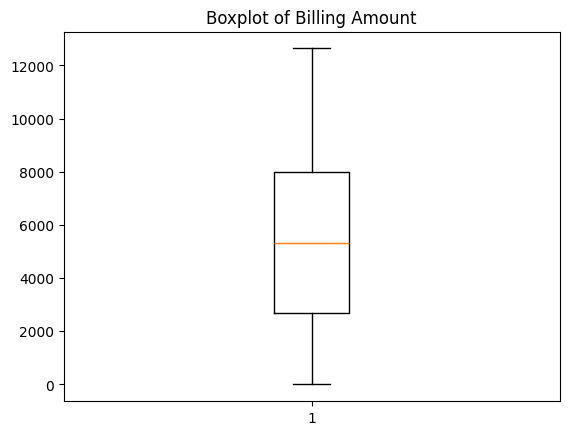

In [1660]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.boxplot(df['Billing Amount'])
plt.title('Boxplot of Billing Amount')
plt.show()

In [1661]:
count_below_50 = (df['Billing Amount'] < 50).sum()
print(f"Number of Billing Amount values below 50: {count_below_50}")

count_below_500 = (df['Billing Amount'] < 500).sum()
print(f"Number of Billing Amount values below 500: {count_below_500}")

count_below_10000 = (df['Billing Amount'] < 10000).sum()
print(f"Number of Billing Amount values below 10000: {count_below_10000}")


Number of Billing Amount values below 50: 248
Number of Billing Amount values below 500: 2426
Number of Billing Amount values below 10000: 46155


In [1662]:
# Calculate median
median = df['Billing Amount'].median()

# Calculate Median Absolute Deviation (MAD)
mad = np.median(np.abs(df['Billing Amount'] - median))

# Calculate Modified Z-Score
# 0.6745 is a constant to make MAD comparable to standard deviation in a normal distribution
modified_z_scores = 0.6745 * (df['Billing Amount'] - median) / mad

# Identify outliers (threshold of 3.5 is common for Modified Z-Score)
outliers = df[np.abs(modified_z_scores) > 3.5]

# Print the number of outliers and their values
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Billing Amount']])

Number of outliers: 0
Empty DataFrame
Columns: [Billing Amount]
Index: []


Number of values below threshold (100): 464
       Billing Amount
106         44.026124
612         66.650071
629         84.579240
851         58.018489
998         85.590023
1316        84.880269
1357        73.460239
1562         5.543663
1568        51.562371
1572        98.146290
1758        20.898945
1955        78.860616
2001        71.624656
2227        53.677398
2623        67.615559
2694        19.856631
2774        18.622631
2935        45.546919
3064        37.398903
3362        11.395221
3398        84.380093
3485        22.347644
3619        29.568717
3926        70.595297
4062        84.008871
4274        74.255966
4282        50.015003
4398        19.570795
4563        68.645194
4599        48.784332
4785        12.418081
5173        56.277295
5314        20.597313
5553        36.642879
5619        65.185653
5812        27.156515
5824        85.632815
5913         0.921261
6369        22.521126
6550        25.182376
6589        94.390200
6601         4.133284
6789      

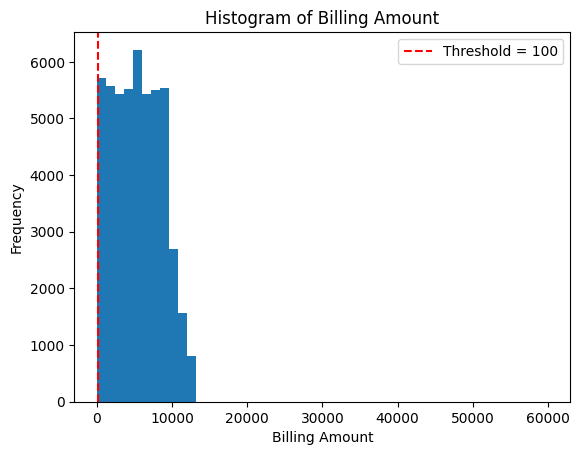

In [1663]:

# Set a domain-specific threshold (e.g., 100 as a plausible minimum billing amount)
threshold = 100
potential_outliers = df[df['Billing Amount'] < threshold]

# Print number and values of potential outliers
print(f"Number of values below threshold ({threshold}): {len(potential_outliers)}")
print(potential_outliers[['Billing Amount']])

# Visualize with a histogram
plt.hist(df['Billing Amount'], bins=50, range=(0, 60000))
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.title('Histogram of Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [1664]:
df[df['Billing Amount'] < 1000]

Name  Age  Gender Blood Type Medical Condition  \
9               Christopher Berg   56    Male         O+            Asthma   
12                 Connor Hansen   36    Male         B-            Cancer   
13                  Robert Bauer   32    Male         B-           Obesity   
15            Ms. Natalie Gamble    6  Female         A+           Obesity   
17           Mrs. Jamie Campbell   86  Female        AB-      Hypertension   
38                 Nicole Lucero   27  Female         B-            Asthma   
39              Pamela Fernandez   61  Female         B+           Obesity   
69                   Erica Myers   23  Female        AB-           Obesity   
78                 Diane Schultz    7  Female        AB+           Obesity   
80                 Nicole Hughes   40  Female        AB-            Asthma   
84                  Cindy Orozco   27  Female         B+           Obesity   
92             Taylor Howell Dds   22    Male         O+            Asthma   
100                Marcus Zamora   65    Male         B-      Hypertension   
106               Sarah Caldwell   12  Female        AB+      Hypertension   
107                David Higgins   14    Male         B+            Cancer   
110                Colton Strong   79    Male         O-            Cancer   
120                  Anne Howell   61  Female         O+           Obesity   
121                 Renee Bailey   89  Female        AB-         Arthritis   
123         Dr. Lauren Clark Dds    7    Male         B-            Cancer   
134                 Alan Alvarez   46    Male         B+      Hypertension   
169               William Campos   33    Male         B-         Arthritis   
194              Joshua Richmond   48    Male         B-            Cancer   
200               Steven Goodwin   62    Male        AB-         Arthritis   
209               Heather Curtis   24  Female         A+           Obesity   
229                Holly Walters   12  Female         B-           Obesity   
236             Joseph Carpenter   77    Male         B-           Obesity   
237                  Larry Mayer   52    Male         B-           Obesity   
238             Clayton Peterson   79    Male        AB-      Hypertension   
245               Jacob Williams   80    Male         A+           Obesity   
330                    Jodi Lang   99  Female         B+          Diabetes   
351            Mrs. Sabrina Ball   22  Female         O-           Obesity   
381                     Amy Wang   44  Female        AB-           Obesity   
394                James Roberts   43    Male         B+            Cancer   
402                 Matthew Bell   89    Male         A+      Hypertension   
429                  Laura Wells   49  Female        AB-          Diabetes   
436             Tiffany Ferguson   86  Female         A+           Obesity   
480                  Briana Ross    4  Female         A-            Asthma   
481              Mary Mccullough   30  Female         O-            Cancer   
488                 Sarah Porter   48  Female        AB-          Diabetes   
500                Brenda Fuller   46  Female         A-            Asthma   
506              George Woodward    3    Male         A+            Asthma   
513               Jessica Macias   19  Female        AB-          Diabetes   
539               Katherine Hale   57  Female         O+            Cancer   
549               Patrick Pierce   48    Male        AB-         Arthritis   
557                 Peter Miller   48    Male         B-            Asthma   
573               Nicole Francis   44  Female        AB+           Obesity   
574                 Steven Smith   64    Male        AB-          Diabetes   
580               Jessica Keller   96  Female         A-            Asthma   
599                Katrina Lopez   22  Female         B-           Obesity   
609               Jenny Reynolds   61  Female         O-            Asthma   
612                Joseph Madden   15    Male     

In [1665]:
# Check how many values have exactly 5 decimals
df['Billing Amount'].astype(str).str.extract(r'\.(\d+)$')[0].str.len().value_counts()


0
6    36927
5     7203
7     4695
4      679
8      381
3       67
9       37
2       10
1        1
Name: count, dtype: int64

In [1666]:
def normalize_billing(value):
    decimals = len(str(value).split('.')[-1]) if '.' in str(value) else 0

    if decimals > 5:
        # Scale it up to reduce decimal places
        factor = 10 ** (decimals - 5)
        return value * factor
    elif decimals < 5:
        # Scale it down to increase decimal precision
        factor = 10 ** (5 - decimals)
        return value / factor
    else:
        return value  # already fine

# Apply fix
df['Billing Amount'] = df['Billing Amount'].abs().apply(normalize_billing)


In [1667]:
# Check how many values have exactly 5 decimals
df['Billing Amount'].astype(str).str.extract(r'\.(\d+)$')[0].str.len().value_counts()


0
5     38749
12     6752
11     4236
13      200
14       58
15        5
Name: count, dtype: int64

In [1668]:
print(df['Billing Amount'].describe())

count     50000.000000
mean      53430.788287
std       64853.613471
min           1.056660
25%       18890.990200
50%       46069.977835
75%       73303.700177
max      531350.788850
Name: Billing Amount, dtype: float64


In [1669]:
# Cell: Impute Low Amounts Function and Usage with Dataset
def impute_low_amounts(values, threshold=500, median_valid=None):
    # If median_valid is not provided, calculate it from values above threshold
    if median_valid is None:
        median_valid = values[values >= threshold].median()
        if pd.isna(median_valid):
            median_valid = values.median()  # Fallback to overall median if no valid values

    # Impute values below threshold with the median
    def impute_single_value(x):
        return median_valid if x < threshold else x

    return values.apply(impute_single_value)

# Apply to the dataset
print("Original Billing Amount data:")
print(df['Billing Amount'].describe())

# Apply the imputation to the dataset
df['Billing Amount'] = impute_low_amounts(df['Billing Amount'])

# Verify the results
print("\nImputed Billing Amount data:")
print(df['Billing Amount'].describe())

# Verify the median used
median_used = df['Billing Amount'][df['Billing Amount'] >= threshold].median()
print(f"\nMedian used for imputation: ${median_used}")

Original Billing Amount data:
count     50000.000000
mean      53430.788287
std       64853.613471
min           1.056660
25%       18890.990200
50%       46069.977835
75%       73303.700177
max      531350.788850
Name: Billing Amount, dtype: float64

Imputed Billing Amount data:
count     50000.000000
mean      53675.240779
std       64739.474911
min         503.927550
25%       19449.079628
50%       46360.928240
75%       73303.700177
max      531350.788850
Name: Billing Amount, dtype: float64

Median used for imputation: $46360.92824


In [1670]:
print(df['Billing Amount'].describe())

count     50000.000000
mean      53675.240779
std       64739.474911
min         503.927550
25%       19449.079628
50%       46360.928240
75%       73303.700177
max      531350.788850
Name: Billing Amount, dtype: float64


In [1671]:
df[df['Billing Amount'] < 100]

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Inferred Gender]
Index: []

In [1672]:
# prompt: display counts of records with billing amounts from: ranges from 1 to 100, 101 to 500, 501 to 1000, 1001 to 5000, 5001 to 10000, 10001 to max

# Assuming 'df' is your DataFrame after all the preprocessing steps

# Define the billing amount ranges
bins = [1, 100, 500, 1000, 5000, 10000, float('inf')]
labels = ['1-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001+']

# Cut the 'Billing Amount' column into these ranges
print(pd.cut(df['Billing Amount'], bins=bins, labels=labels, right=False).value_counts())

# Display the counts for each range
# print(df['Billing_Range'].value_counts())


Billing Amount
10001+        45313
1001-5000      2254
5001-10000     2230
501-1000        203
101-500           0
1-100             0
Name: count, dtype: int64


In [1673]:
df[df['Billing Amount'] < 50]

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Inferred Gender]
Index: []

In [1674]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   27    Male         O-            Asthma        06/06/2022   
1   Leslie Terry   68  Female         O-            Cancer        19/11/2021   
2    Danny Smith   21    Male         A+      Hypertension        05/03/2022   
3   Andrew Watts   91    Male        AB-          Diabetes        06/04/2020   
4  Adrienne Bell   52  Female         A+          Diabetes        31/12/2022   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0  Mark Hartman Jr.  Sons And Miller              Cigna     26259.80554   
1  Angela Contreras      White-White              Cigna     14713.87317   
2        David Ruiz  Group Middleton           Medicare     51314.88104   
3    Jenny Griffith  Morris-Arellano         Blue Cross     89727.93157   
4     Cynthia Scott   Williams-Davis         Blue Cross     20155.22684   

   Room Number Admission Type Discharge Date   Medication  Test Results  \
0          379       Elective     18/08/2022    Ibuprofen        Normal   
1          113       Elective     20/11/2021    Ibuprofen  Inconclusive   
2          154      Emergency     16/05/2022  Paracetamol        Normal   
3          293         Urgent     26/04/2020    Ibuprofen      Abnormal   
4          265      Emergency     11/02/2023   Penicillin      Abnormal   

  Inferred Gender  
0            Male  
1          Female  
2            Male  
3            Male  
4          Female

In [1675]:
# Calculate the number of records where 'Gender' is 'Unknown'
unknown_gender_count = df[df['Inferred Gender'] == 'Unknown'].shape[0]

print(f"Number of records with 'Unknown' gender: {unknown_gender_count}")

# You can also check the value counts for the 'Gender' column to see all categories and their counts
print("\nValue counts for 'Gender' column:")
print(df['Gender'].value_counts())

Number of records with 'Unknown' gender: 0

Value counts for 'Gender' column:
Gender
Male      25240
Female    24760
Name: count, dtype: int64


In [1676]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime objects
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], dayfirst=True)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], dayfirst=True)


# Calculate 'Stay Days'
# Subtracting the dates results in a Timedelta object, .dt.days extracts the number of days
df['Stay Days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Print the first few rows with the new column
print(df[['Date of Admission', 'Discharge Date', 'Stay Days']].head())

# Check descriptive statistics of the new column
print("\nDescription of Stay Days:")
print(df['Stay Days'].describe())

# Check for any negative stay days (might indicate data entry errors)
negative_stay_days = df[df['Stay Days'] < 0]
print(f"\nNumber of records with negative Stay Days: {len(negative_stay_days)}")
# negative_stay_days[['Date of Admission', 'Discharge Date', 'Stay Days']].head()


  Date of Admission Discharge Date  Stay Days
0        2022-06-06     2022-08-18         73
1        2021-11-19     2021-11-20          1
2        2022-03-05     2022-05-16         72
3        2020-04-06     2020-04-26         20
4        2022-12-31     2023-02-11         42

Description of Stay Days:
count    50000.000000
mean        42.652000
std         25.853069
min         -1.000000
25%         21.000000
50%         42.000000
75%         63.000000
max        100.000000
Name: Stay Days, dtype: float64

Number of records with negative Stay Days: 203


In [1677]:
print(df['Admission Type'].unique())


['Elective' 'Emergency' 'Urgent' 'Unknown']


# Encoding

In [1678]:
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   27    Male         O-            Asthma        2022-06-06   
1   Leslie Terry   68  Female         O-            Cancer        2021-11-19   
2    Danny Smith   21    Male         A+      Hypertension        2022-03-05   
3   Andrew Watts   91    Male        AB-          Diabetes        2020-04-06   
4  Adrienne Bell   52  Female         A+          Diabetes        2022-12-31   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0  Mark Hartman Jr.  Sons And Miller              Cigna     26259.80554   
1  Angela Contreras      White-White              Cigna     14713.87317   
2        David Ruiz  Group Middleton           Medicare     51314.88104   
3    Jenny Griffith  Morris-Arellano         Blue Cross     89727.93157   
4     Cynthia Scott   Williams-Davis         Blue Cross     20155.22684   

   Room Number Admission Type Discharge Date   Medication  Test Results  \
0          379       Elective     2022-08-18    Ibuprofen        Normal   
1          113       Elective     2021-11-20    Ibuprofen  Inconclusive   
2          154      Emergency     2022-05-16  Paracetamol        Normal   
3          293         Urgent     2020-04-26    Ibuprofen      Abnormal   
4          265      Emergency     2023-02-11   Penicillin      Abnormal   

  Inferred Gender  Stay Days  
0            Male         73  
1          Female          1  
2            Male         72  
3            Male         20  
4          Female         42

In [1679]:
df = df.drop('Name', axis=1)

In [1680]:
df.head()

Age  Gender Blood Type Medical Condition Date of Admission  \
0   27    Male         O-            Asthma        2022-06-06   
1   68  Female         O-            Cancer        2021-11-19   
2   21    Male         A+      Hypertension        2022-03-05   
3   91    Male        AB-          Diabetes        2020-04-06   
4   52  Female         A+          Diabetes        2022-12-31   

             Doctor         Hospital Insurance Provider  Billing Amount  \
0  Mark Hartman Jr.  Sons And Miller              Cigna     26259.80554   
1  Angela Contreras      White-White              Cigna     14713.87317   
2        David Ruiz  Group Middleton           Medicare     51314.88104   
3    Jenny Griffith  Morris-Arellano         Blue Cross     89727.93157   
4     Cynthia Scott   Williams-Davis         Blue Cross     20155.22684   

   Room Number Admission Type Discharge Date   Medication  Test Results  \
0          379       Elective     2022-08-18    Ibuprofen        Normal   
1          113       Elective     2021-11-20    Ibuprofen  Inconclusive   
2          154      Emergency     2022-05-16  Paracetamol        Normal   
3          293         Urgent     2020-04-26    Ibuprofen      Abnormal   
4          265      Emergency     2023-02-11   Penicillin      Abnormal   

  Inferred Gender  Stay Days  
0            Male         73  
1          Female          1  
2            Male         72  
3            Male         20  
4          Female         42

In [1681]:
# Encoding Gender with One-Hot Encoding

df = pd.get_dummies(df, columns=['Inferred Gender'], drop_first=False)
df['Inferred Gender_Female'] = df['Inferred Gender_Female'].astype(int)
df['Inferred Gender_Male'] = df['Inferred Gender_Male'].astype(int)
# df['Inferred Gender_Unknown'] = df['Inferred Gender_Unknown'].astype(int)

In [1682]:
df = df.drop('Gender', axis=1)

In [1683]:
# One-hot encoding the Blood Type column

df = pd.get_dummies(df, columns=['Blood Type'])
# List of columns to convert
columns_to_convert = [
    'Blood Type_A+', 'Blood Type_A-', 'Blood Type_AB+',
    'Blood Type_AB-', 'Blood Type_B+','Blood Type_B-','Blood Type_O+',
    'Blood Type_O-'
]

# Loop to convert each column to integer type
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [1684]:
# One-hot encoding the Medical Condition column
df = pd.get_dummies(df, columns=['Medical Condition'], drop_first=False)

columns_to_convert = [
    'Medical Condition_Arthritis', 'Medical Condition_Asthma', 'Medical Condition_Cancer',
    'Medical Condition_Diabetes', 'Medical Condition_Hypertension','Medical Condition_Obesity'
]

# Loop to convert each column to integer type
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [1685]:
# Frequency Encoding for Doctor
df['Doctor_Encoded'] = df['Doctor'].map(df['Doctor'].value_counts())

# Frequency Encoding for Hospital
df['Hospital_Encoded'] = df['Hospital'].map(df['Hospital'].value_counts())

In [1686]:
print(df['Doctor_Encoded'].value_counts())

Doctor_Encoded
528    1056
350    1050
517    1034
501    1002
283     849
804     804
353     706
231     693
341     682
337     674
320     640
310     620
585     585
571     571
272     544
536     536
529     529
260     520
515     515
508     508
253     506
252     504
496     496
245     490
489     489
482     482
473     473
236     472
463     463
461     461
458     458
228     456
455     455
441     441
434     434
425     425
415     415
414     414
412     412
410     410
402     402
401     401
400     400
397     397
396     396
393     393
390     390
389     389
383     383
381     381
372     372
369     369
364     364
360     360
351     351
349     349
348     348
347     347
345     345
339     339
334     334
329     329
326     326
325     325
322     322
316     316
312     312
307     307
305     305
303     303
299     299
149     298
297     297
295     295
293     293
286     286
285     285
284     284
280     280
278     278
273     273
271     271
2

In [1687]:
df = df.drop('Doctor', axis=1)
df = df.drop('Hospital', axis=1)

In [1688]:
print(df.columns)

Index(['Age', 'Date of Admission', 'Insurance Provider', 'Billing Amount',
       'Room Number', 'Admission Type', 'Discharge Date', 'Medication',
       'Test Results', 'Stay Days', 'Inferred Gender_Female',
       'Inferred Gender_Male', 'Blood Type_A+', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Arthritis',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Doctor_Encoded', 'Hospital_Encoded'],
      dtype='object')


In [1689]:
# One-hot encoding the Insurance Provider column
df = pd.get_dummies(df, columns=['Insurance Provider'], drop_first=False)

columns_to_convert = [
    'Insurance Provider_Aetna', 'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
    'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare'
]

# Loop to convert each column to integer type
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [1690]:
# Label encoding the Admission Type values based on priority (Label Encoding)
admission_type_map = {'Unknown': 0,'Elective': 1, 'Urgent': 2, 'Emergency': 3}
df['Admission Type'] = df['Admission Type'].map(admission_type_map)

In [1691]:
# One-hot encoding the Medication column
df = pd.get_dummies(df, columns=['Medication'], drop_first=False)

columns_to_convert = [
    'Medication_Aspirin', 'Medication_Ibuprofen', 'Medication_Lipitor',
    'Medication_Paracetamol', 'Medication_Penicillin'
]

# Loop to convert each column to integer type
for col in columns_to_convert:
    df[col] = df[col].astype(int)

In [1692]:
# Label encoding the Test Results (target) column
test_results_map = {'Normal': 0, 'Inconclusive': 1, 'Abnormal': 2}
df['Test Results'] = df['Test Results'].map(test_results_map)

df.head()

Age Date of Admission  Billing Amount  Room Number  Admission Type  \
0   27        2022-06-06     26259.80554          379               1   
1   68        2021-11-19     14713.87317          113               1   
2   21        2022-03-05     51314.88104          154               3   
3   91        2020-04-06     89727.93157          293               2   
4   52        2022-12-31     20155.22684          265               3   

  Discharge Date  Test Results  Stay Days  Inferred Gender_Female  \
0     2022-08-18             0         73                       0   
1     2021-11-20             1          1                       1   
2     2022-05-16             0         72                       0   
3     2020-04-26             2         20                       0   
4     2023-02-11             2         42                       1   

   Inferred Gender_Male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  \
0                     1              0              0               0   
1                     0              0              0               0   
2                     1              1              0               0   
3                     1              0              0               0   
4                     0              1              0               0   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0               0              0              0              0              1   
1               0              0              0              0              1   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              0              0              0              0   

   Medical Condition_Arthritis  Medical Condition_Asthma  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         0                           0   
1                         1                           0   
2                         0                           0   
3                         0                           1   
4                         0                           1   

   Medical Condition_Hypertension  Medical Condition_Obesity  Doctor_Encoded  \
0                               0                          0             528   
1                               0                          0             585   
2                               1                          0             349   
3                               0                          0              66   
4                               0                          0             360   

   Hospital_Encoded  Insurance Provider_Aetna  Insurance Provider_Blue Cross  \
0              1350                         0                              0   
1              2108                         0                              0   
2              1561                         0                              0   
3              1423                         0                              1   
4              1350                         0                              1   

   Insurance Provider_Cigna  Insurance Provider_Medicare  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   Insurance Provider_Self-Pay  Insurance Provider_UnitedHealthcare  \
0                        False                                    0   
1                        False            

In [1693]:
df.shape

(50000, 37)

In [1694]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])

df.head()

Age Date of Admission  Billing Amount  Room Number  Admission Type  \
0  0.27        2022-06-06     26259.80554          379               1   
1  0.68        2021-11-19     14713.87317          113               1   
2  0.21        2022-03-05     51314.88104          154               3   
3  0.91        2020-04-06     89727.93157          293               2   
4  0.52        2022-12-31     20155.22684          265               3   

  Discharge Date  Test Results  Stay Days  Inferred Gender_Female  \
0     2022-08-18             0         73                       0   
1     2021-11-20             1          1                       1   
2     2022-05-16             0         72                       0   
3     2020-04-26             2         20                       0   
4     2023-02-11             2         42                       1   

   Inferred Gender_Male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  \
0                     1              0              0               0   
1                     0              0              0               0   
2                     1              1              0               0   
3                     1              0              0               0   
4                     0              1              0               0   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0               0              0              0              0              1   
1               0              0              0              0              1   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              0              0              0              0   

   Medical Condition_Arthritis  Medical Condition_Asthma  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         0                           0   
1                         1                           0   
2                         0                           0   
3                         0                           1   
4                         0                           1   

   Medical Condition_Hypertension  Medical Condition_Obesity  Doctor_Encoded  \
0                               0                          0             528   
1                               0                          0             585   
2                               1                          0             349   
3                               0                          0              66   
4                               0                          0             360   

   Hospital_Encoded  Insurance Provider_Aetna  Insurance Provider_Blue Cross  \
0              1350                         0                              0   
1              2108                         0                              0   
2              1561                         0                              0   
3              1423                         0                              1   
4              1350                         0                              1   

   Insurance Provider_Cigna  Insurance Provider_Medicare  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   Insurance Provider_Self-Pay  Insurance Provider_UnitedHealthcare  \
0                        False                                    0   
1                        False       

#Normalization

In [1695]:
# Check unique values in 'Date of Admission'
unique_values = df['Date of Admission'].unique()
print("Unique values in 'Date of Admission':", unique_values)

# Find the minimum and maximum values
min_date = df['Date of Admission'].min()
max_date = df['Date of Admission'].max()
print("Minimum date of admission:", min_date)
print("Maximum date of admission:", max_date)

Unique values in 'Date of Admission': <DatetimeArray>
['2022-06-06 00:00:00', '2021-11-19 00:00:00', '2022-03-05 00:00:00',
 '2020-04-06 00:00:00', '2022-12-31 00:00:00', '2020-08-19 00:00:00',
 '2021-11-02 00:00:00', '2021-07-28 00:00:00', '2023-07-18 00:00:00',
 '2023-04-08 00:00:00',
 ...
 '2023-09-19 00:00:00', '2022-06-05 00:00:00', '2021-09-19 00:00:00',
 '2020-09-02 00:00:00', '2023-02-09 00:00:00', '2024-10-25 00:00:00',
 '2023-12-17 00:00:00', '2022-05-23 00:00:00', '2022-11-15 00:00:00',
 '2024-10-14 00:00:00']
Length: 2101, dtype: datetime64[ns]
Minimum date of admission: 2019-04-02 00:00:00
Maximum date of admission: 2024-12-31 00:00:00


In [1696]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

# Convert to days since earliest admission
min_date = df['Date of Admission'].min()
df['Date of Admission'] = (df['Date of Admission'] - min_date).dt.days

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
df['Date of Admission'] = scaler.fit_transform(df[['Date of Admission']])

# Preview result
print(df[['Date of Admission']].head())


   Date of Admission
0           0.552857
1           0.458095
2           0.508571
3           0.176190
4           0.651905


In [1697]:
unique_values = df['Billing Amount'].unique()
min_value = df['Billing Amount'].min()
max_value = df['Billing Amount'].max()
print("Unique values in 'Billing Amount':", unique_values)
print("Minimum value in 'Billing Amount':", min_value)
print("Maximum value in 'Billing Amount':", max_value)

Unique values in 'Billing Amount': [26259.80554 14713.87317 51314.88104 ... 18163.64848 13988.21577
 45706.10507]
Minimum value in 'Billing Amount': 503.92755
Maximum value in 'Billing Amount': 531350.78885


In [1698]:
df['Billing Amount'] = scaler.fit_transform(df[['Billing Amount']])
df.head()

Age  Date of Admission  Billing Amount  Room Number  Admission Type  \
0  0.27           0.552857        0.048518          379               1   
1  0.68           0.458095        0.026768          113               1   
2  0.21           0.508571        0.095717          154               3   
3  0.91           0.176190        0.168079          293               2   
4  0.52           0.651905        0.037019          265               3   

  Discharge Date  Test Results  Stay Days  Inferred Gender_Female  \
0     2022-08-18             0         73                       0   
1     2021-11-20             1          1                       1   
2     2022-05-16             0         72                       0   
3     2020-04-26             2         20                       0   
4     2023-02-11             2         42                       1   

   Inferred Gender_Male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  \
0                     1              0              0               0   
1                     0              0              0               0   
2                     1              1              0               0   
3                     1              0              0               0   
4                     0              1              0               0   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0               0              0              0              0              1   
1               0              0              0              0              1   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              0              0              0              0   

   Medical Condition_Arthritis  Medical Condition_Asthma  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         0                           0   
1                         1                           0   
2                         0                           0   
3                         0                           1   
4                         0                           1   

   Medical Condition_Hypertension  Medical Condition_Obesity  Doctor_Encoded  \
0                               0                          0             528   
1                               0                          0             585   
2                               1                          0             349   
3                               0                          0              66   
4                               0                          0             360   

   Hospital_Encoded  Insurance Provider_Aetna  Insurance Provider_Blue Cross  \
0              1350                         0                              0   
1              2108                         0                              0   
2              1561                         0                              0   
3              1423                         0                              1   
4              1350                         0                              1   

   Insurance Provider_Cigna  Insurance Provider_Medicare  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   Insurance Provider_Self-Pay  Insurance Provider_UnitedHealthcare  \
0                        False                                    0   
1                        False 

In [1699]:
unique_values = df['Room Number'].unique()
min_value = df['Room Number'].min()
max_value = df['Room Number'].max()
print("Unique values in 'Room Number':", unique_values)
print("Minimum value in 'Room Number':", min_value)
print("Maximum value in 'Room Number':", max_value)

Unique values in 'Room Number': [379 113 154 293 265 328 335 118 334 333 225  87 249 184 449 261 274 325
 348 167 349 182  54 315 214 463 126 476 250 313  82 353 260 382 231 485
  63 255 332 433 346 124 140 386 102 343 496 344 220 296 318  70 189 307
 248 384 237 131 270 101 222 256 304 329 283 120 402 385 491 285 497 300
 312  95  51 210 435 405  55 336 392 339 188 460 292 280 387 224 362 281
 368 127 141 168 322 326 411 230 337 253 125 316 178 174 400 211 226 393
 289 145 461 324 114 133 378 104 419 219 238 239 112 156 445 272 276 310
 203  74 317 414 398 294 475 208 439 421  98 290 469 301 258 119 388 134
  97 377 115 212 494 263 100 374 489 314 177  58 474 483 399 420 413 299
 207 235 418 130  52 381 295 448 108 409 447 190 437  68 472  88 129  67
 298 431 267 196 193 432 198 159 430 197 266 252 327 347  60 259 401  96
 341 396 279 395 323 103 158 480 166 383 458 492 331 106 340 403 147 408
 308 415 478 228 232 338 355 121 201 284 394 241 372 246 373 152 179 330
 404 243 345 128 36

In [1700]:
df['Room Number'] = scaler.fit_transform(df[['Room Number']])
print(df[['Room Number']].head())

   Room Number
0     0.731111
1     0.140000
2     0.231111
3     0.540000
4     0.477778


In [1701]:
unique_values = df['Admission Type'].unique()
min_value = df['Admission Type'].min()
max_value = df['Admission Type'].max()
print("Unique values in 'Admission Type':", unique_values)
print("Minimum value in 'Admission Type':", min_value)
print("Maximum value in 'Admission Type':", max_value)

Unique values in 'Admission Type': [1 3 2 0]
Minimum value in 'Admission Type': 0
Maximum value in 'Admission Type': 3


In [1702]:
unique_values = df['Discharge Date'].unique()
min_value = df['Discharge Date'].min()
max_value = df['Discharge Date'].max()
print("Unique values in 'Discharge Date':", unique_values)
print("Minimum value in 'Discharge Date':", min_value)
print("Maximum value in 'Discharge Date':", max_value)

Unique values in 'Discharge Date': <DatetimeArray>
['2022-08-18 00:00:00', '2021-11-20 00:00:00', '2022-05-16 00:00:00',
 '2020-04-26 00:00:00', '2023-02-11 00:00:00', '2020-11-18 00:00:00',
 '2021-12-15 00:00:00', '2021-09-17 00:00:00', '2023-09-22 00:00:00',
 '2023-04-22 00:00:00',
 ...
 '2025-04-03 00:00:00', '2019-04-10 00:00:00', '2025-03-14 00:00:00',
 '2019-04-04 00:00:00', '2025-03-28 00:00:00', '2019-04-08 00:00:00',
 '2025-03-31 00:00:00', '2025-04-10 00:00:00', '2025-03-12 00:00:00',
 '2019-04-05 00:00:00']
Length: 2190, dtype: datetime64[ns]
Minimum value in 'Discharge Date': 2019-04-02 00:00:00
Maximum value in 'Discharge Date': 2025-04-10 00:00:00


In [1703]:
# Convert 'Discharge Date' to datetime if it's not already in datetime format
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Convert 'Discharge Date' to days since the earliest discharge date
min_date = df['Discharge Date'].min()
df['Discharge Date'] = (df['Discharge Date'] - min_date).dt.days

df['Discharge Date'] = scaler.fit_transform(df[['Discharge Date']])
df.head()

Age  Date of Admission  Billing Amount  Room Number  Admission Type  \
0  0.27           0.552857        0.048518     0.731111               1   
1  0.68           0.458095        0.026768     0.140000               1   
2  0.21           0.508571        0.095717     0.231111               3   
3  0.91           0.176190        0.168079     0.540000               2   
4  0.52           0.651905        0.037019     0.477778               3   

   Discharge Date  Test Results  Stay Days  Inferred Gender_Female  \
0        0.560909             0         73                       0   
1        0.437727             1          1                       1   
2        0.518182             0         72                       0   
3        0.177273             2         20                       0   
4        0.641364             2         42                       1   

   Inferred Gender_Male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  \
0                     1              0              0               0   
1                     0              0              0               0   
2                     1              1              0               0   
3                     1              0              0               0   
4                     0              1              0               0   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0               0              0              0              0              1   
1               0              0              0              0              1   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              0              0              0              0   

   Medical Condition_Arthritis  Medical Condition_Asthma  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         0                           0   
1                         1                           0   
2                         0                           0   
3                         0                           1   
4                         0                           1   

   Medical Condition_Hypertension  Medical Condition_Obesity  Doctor_Encoded  \
0                               0                          0             528   
1                               0                          0             585   
2                               1                          0             349   
3                               0                          0              66   
4                               0                          0             360   

   Hospital_Encoded  Insurance Provider_Aetna  Insurance Provider_Blue Cross  \
0              1350                         0                              0   
1              2108                         0                              0   
2              1561                         0                              0   
3              1423                         0                              1   
4              1350                         0                              1   

   Insurance Provider_Cigna  Insurance Provider_Medicare  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   Insurance Provider_Self-Pay  Insurance Provider_UnitedHealthcare  \
0                        False                                    0   
1                        

In [1704]:
# df = df.drop('Admission Date', axis=1)
# print(df.columns)

In [1705]:
unique_values = df['Test Results'].unique()
min_value = df['Test Results'].min()
max_value = df['Test Results'].max()
print("Unique values in 'Test Results':", unique_values)
print("Minimum value in 'Test Results':", min_value)
print("Maximum value in 'Test Results':", max_value)

Unique values in 'Test Results': [0 1 2]
Minimum value in 'Test Results': 0
Maximum value in 'Test Results': 2


In [1706]:
unique_values = df['Doctor_Encoded'].unique()
min_value = df['Doctor_Encoded'].min()
max_value = df['Doctor_Encoded'].max()
print("Unique values in 'Doctor_Encoded':", unique_values)
print("Minimum value in 'Doctor_Encoded':", min_value)
print("Maximum value in 'Doctor_Encoded':", max_value)

Unique values in 'Doctor_Encoded': [528 585 349  66 360 461 260 389 136 225 390 369 400 804 322 339 179 129
 297 145 245 253 412 337 571 396 189 353 217 228 299  76 489 110 458 402
 177 372 326 350 131 236 415 285 280 434 320  31 393 455  48  52  37 273
 283 473 517 241 351 206  44 501 108 117 185 508 364 536 341 329 307 172
 482 441 202 414  51 310 496 176  39 348 231 286 410 267 295 278 111 224
 215 257 154 347 529 334 133 166  73 156  54 252 425 256 345 515 271 182
 381 167 152 293 305  94  79 201 316 251 284 221 383 401 227 211  74 207
 203  70 325 238 303 214 112 272 149 463  43 199 312 125 397 128 254 158
 124 165 137 263  57 104  32  71 248   7 113  72  88  34  65  63  55  62
  50 101  68  30  77  67  25  13  53  45  28   1  12   3   9   6]
Minimum value in 'Doctor_Encoded': 1
Maximum value in 'Doctor_Encoded': 804


In [1707]:
unique_values = df['Hospital_Encoded'].unique()
min_value = df['Hospital_Encoded'].min()
max_value = df['Hospital_Encoded'].max()
print("Unique values in 'Hospital_Encoded':", unique_values)
print("Minimum value in 'Hospital_Encoded':", min_value)
print("Maximum value in 'Hospital_Encoded':", max_value)

Unique values in 'Hospital_Encoded': [1350 2108 1561 1423 1321 1014 1661 1858  899  507 2164  482 1108 1742
  140 2079   99 1211 1237 1250  373  596  464 1305  920 1567  160  581
  602  416  953  757  916  778  155  840 1433 1310  877 1583  932 1086
  728  879  417   79  371  144  112  145  148  105   96   29    8   17
    6  959]
Minimum value in 'Hospital_Encoded': 6
Maximum value in 'Hospital_Encoded': 2164


In [1708]:
# Normalize 'Doctor_Encoded'
df['Doctor_Encoded'] = scaler.fit_transform(df[['Doctor_Encoded']])

# Normalize 'Hospital_Encoded'
df['Hospital_Encoded'] = scaler.fit_transform(df[['Hospital_Encoded']])
df.head()

Age  Date of Admission  Billing Amount  Room Number  Admission Type  \
0  0.27           0.552857        0.048518     0.731111               1   
1  0.68           0.458095        0.026768     0.140000               1   
2  0.21           0.508571        0.095717     0.231111               3   
3  0.91           0.176190        0.168079     0.540000               2   
4  0.52           0.651905        0.037019     0.477778               3   

   Discharge Date  Test Results  Stay Days  Inferred Gender_Female  \
0        0.560909             0         73                       0   
1        0.437727             1          1                       1   
2        0.518182             0         72                       0   
3        0.177273             2         20                       0   
4        0.641364             2         42                       1   

   Inferred Gender_Male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  \
0                     1              0              0               0   
1                     0              0              0               0   
2                     1              1              0               0   
3                     1              0              0               0   
4                     0              1              0               0   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0               0              0              0              0              1   
1               0              0              0              0              1   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              0              0              0              0   

   Medical Condition_Arthritis  Medical Condition_Asthma  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         0                           0   
1                         1                           0   
2                         0                           0   
3                         0                           1   
4                         0                           1   

   Medical Condition_Hypertension  Medical Condition_Obesity  Doctor_Encoded  \
0                               0                          0        0.656289   
1                               0                          0        0.727273   
2                               1                          0        0.433375   
3                               0                          0        0.080946   
4                               0                          0        0.447073   

   Hospital_Encoded  Insurance Provider_Aetna  Insurance Provider_Blue Cross  \
0          0.622799                         0                              0   
1          0.974050                         0                              0   
2          0.720575                         0                              0   
3          0.656627                         0                              1   
4          0.622799                         0                              1   

   Insurance Provider_Cigna  Insurance Provider_Medicare  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   Insurance Provider_Self-Pay  Insurance Provider_UnitedHealthcare  \
0                        False                                    0   
1                        

In [1709]:
df['Stay Days'] = scaler.fit_transform(df[['Stay Days']])
df['Insurance Provider_Self-Pay'] = df['Insurance Provider_Self-Pay'].astype(int)

df.head()


Age  Date of Admission  Billing Amount  Room Number  Admission Type  \
0  0.27           0.552857        0.048518     0.731111               1   
1  0.68           0.458095        0.026768     0.140000               1   
2  0.21           0.508571        0.095717     0.231111               3   
3  0.91           0.176190        0.168079     0.540000               2   
4  0.52           0.651905        0.037019     0.477778               3   

   Discharge Date  Test Results  Stay Days  Inferred Gender_Female  \
0        0.560909             0   0.732673                       0   
1        0.437727             1   0.019802                       1   
2        0.518182             0   0.722772                       0   
3        0.177273             2   0.207921                       0   
4        0.641364             2   0.425743                       1   

   Inferred Gender_Male  Blood Type_A+  Blood Type_A-  Blood Type_AB+  \
0                     1              0              0               0   
1                     0              0              0               0   
2                     1              1              0               0   
3                     1              0              0               0   
4                     0              1              0               0   

   Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  Blood Type_O-  \
0               0              0              0              0              1   
1               0              0              0              0              1   
2               0              0              0              0              0   
3               1              0              0              0              0   
4               0              0              0              0              0   

   Medical Condition_Arthritis  Medical Condition_Asthma  \
0                            0                         1   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   Medical Condition_Cancer  Medical Condition_Diabetes  \
0                         0                           0   
1                         1                           0   
2                         0                           0   
3                         0                           1   
4                         0                           1   

   Medical Condition_Hypertension  Medical Condition_Obesity  Doctor_Encoded  \
0                               0                          0        0.656289   
1                               0                          0        0.727273   
2                               1                          0        0.433375   
3                               0                          0        0.080946   
4                               0                          0        0.447073   

   Hospital_Encoded  Insurance Provider_Aetna  Insurance Provider_Blue Cross  \
0          0.622799                         0                              0   
1          0.974050                         0                              0   
2          0.720575                         0                              0   
3          0.656627                         0                              1   
4          0.622799                         0                              1   

   Insurance Provider_Cigna  Insurance Provider_Medicare  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         0                            0   
4                         0                            0   

   Insurance Provider_Self-Pay  Insurance Provider_UnitedHealthcare  \
0                            0                                    0   
1                        

# Applying PCA

In [1710]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA - choose number of components or set to retain 95% variance
pca = PCA(n_components=0.95)  # keeps enough components to explain 95% variance
df_pca = pca.fit_transform(df)

# Print how much variance each principal component explains
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)


Explained variance ratio: [0.16211021 0.09309077 0.08587827 0.05675054 0.05493577 0.04757091
 0.04386354 0.04187768 0.03679016 0.03493895 0.03263395 0.02998837
 0.02704435 0.0247471  0.02319639 0.02298569 0.02143684 0.02050952
 0.01869901 0.01605063 0.01588795 0.01475138 0.01311528 0.01152872]
Number of components selected: 24


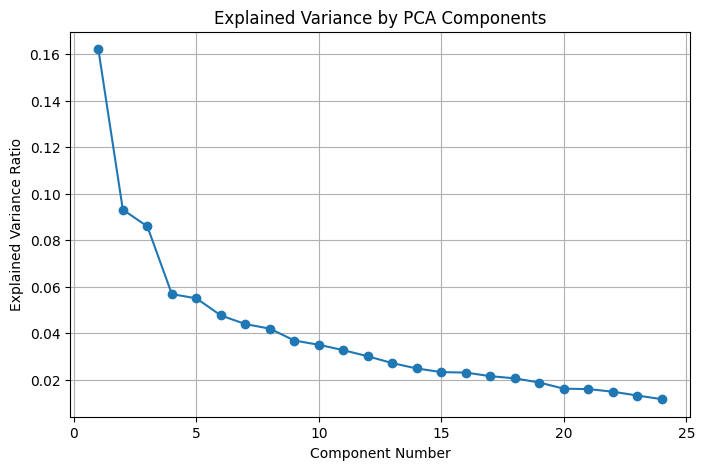

In [1711]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


# Elbow Method

In [1712]:
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(df)

In [1713]:
# Print how much variance each principal component explains
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)


Explained variance ratio: [0.16211021 0.09309077 0.08587827 0.05675054 0.05493577 0.04757091
 0.04386354 0.04187768 0.03679016 0.03493895 0.03263395 0.02998837
 0.02704435 0.0247471  0.02319639 0.02298569 0.02143684 0.02050952
 0.01869901 0.01605063 0.01588795]
Number of components selected: 21


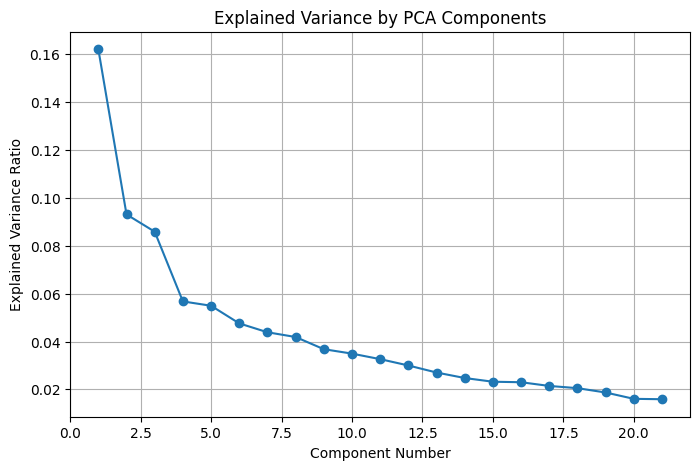

In [1714]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [1715]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Assuming your dataframe is 'df' and contains only numeric features

# # 1. Scale your data
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df)

# # 2. Apply PCA to keep 90% variance
# pca = PCA(n_components=0.9)
# X_pca = pca.fit_transform(X_scaled)

# # 3. Print explained variance ratio and number of components chosen
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Number of components selected:", pca.n_components_)

# # 4. Plot explained variance ratio per component
# plt.figure(figsize=(8,5))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
# plt.title('Explained Variance by PCA Components')
# plt.xlabel('Component Number')
# plt.ylabel('Explained Variance Ratio')
# plt.grid(True)
# plt.show()

# # 5. Optional: Plot 2D scatter of first two PCA components
# plt.figure(figsize=(8,6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
# plt.title('2D Scatter Plot of First Two PCA Components')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.grid(True)
# plt.show()

# # 6. Optional: Print PCA components (how original features contribute)
# print("PCA Components (each row corresponds to a principal component):")
# print(pca.components_)



In [1716]:
# X = df.drop('Outcome', axis=1)
# y = df['Outcome']


# Naïve Bayes (Without PCA)

In [1717]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import classification_report, confusion_matrix

# nb = GaussianNB()
# nb.fit(X_train, y_train)
# y_pred = nb.predict(X_test)

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


### Naïve Bayes + PCA

In [1718]:
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import GaussianNB

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=5)),  # Try other values too
#     ('nb', GaussianNB())
# ])

# pipeline.fit(X_train, y_train)
# y_pred_pca = pipeline.predict(X_test)

# print(confusion_matrix(y_test, y_pred_pca))
# print(classification_report(y_test, y_pred_pca))
